### Improting the libraries and data set 

In [410]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
data = pd.read_csv('../../data/Student Depression Dataset.csv')

#  Display shape and first 5 rows
print(f"Dataset Shape: {data.shape}")
data.head()


Dataset Shape: (27901, 18)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [411]:
duplicated_rows= data[data.duplicated(keep=False)]
print(duplicated_rows)


Empty DataFrame
Columns: [id, Gender, Age, City, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression]
Index: []


### Interpretation
there are no duplicated data entries in the dataset

In [412]:
# Colum names 
data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [413]:
##  rename long colom names

data = data.rename(columns={
    'Academic Pressure': 'Academic_Pressure',
    'Work/Study Hours': 'Study_Hours',
    'Work Pressure': 'Work_Pressure',
    'Study Satisfaction': 'Study_Satisfaction',
    'Job Satisfaction': 'Job_Satisfaction',
    'Sleep Duration': 'Sleep_Duration',
    'Dietary Habits' : 'Dietary_Habits',
    'Have you ever had suicidal thoughts ?': 'Suicidal_Thoughts',
    'Financial Stress' : 'Financial_Stress',
    'Family History of Mental Illness': 'Mental_Illness_History',

})

In [414]:
# renamed Colum names 
data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic_Pressure',
       'Work_Pressure', 'CGPA', 'Study_Satisfaction', 'Job_Satisfaction',
       'Sleep_Duration', 'Dietary_Habits', 'Degree', 'Suicidal_Thoughts',
       'Study_Hours', 'Financial_Stress', 'Mental_Illness_History',
       'Depression'],
      dtype='object')

In [415]:
# data type of each column
data.dtypes

id                          int64
Gender                     object
Age                       float64
City                       object
Profession                 object
Academic_Pressure         float64
Work_Pressure             float64
CGPA                      float64
Study_Satisfaction        float64
Job_Satisfaction          float64
Sleep_Duration             object
Dietary_Habits             object
Degree                     object
Suicidal_Thoughts          object
Study_Hours               float64
Financial_Stress          float64
Mental_Illness_History     object
Depression                  int64
dtype: object

In [416]:
# Data set information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      27901 non-null  int64  
 1   Gender                  27901 non-null  object 
 2   Age                     27901 non-null  float64
 3   City                    27901 non-null  object 
 4   Profession              27901 non-null  object 
 5   Academic_Pressure       27901 non-null  float64
 6   Work_Pressure           27901 non-null  float64
 7   CGPA                    27901 non-null  float64
 8   Study_Satisfaction      27901 non-null  float64
 9   Job_Satisfaction        27901 non-null  float64
 10  Sleep_Duration          27901 non-null  object 
 11  Dietary_Habits          27901 non-null  object 
 12  Degree                  27901 non-null  object 
 13  Suicidal_Thoughts       27901 non-null  object 
 14  Study_Hours             27901 non-null

In [417]:
# no of missing values in each column
data.isnull().sum()

id                        0
Gender                    0
Age                       0
City                      0
Profession                0
Academic_Pressure         0
Work_Pressure             0
CGPA                      0
Study_Satisfaction        0
Job_Satisfaction          0
Sleep_Duration            0
Dietary_Habits            0
Degree                    0
Suicidal_Thoughts         0
Study_Hours               0
Financial_Stress          3
Mental_Illness_History    0
Depression                0
dtype: int64

In [418]:
# Traverse data frame to detect mixed data types
for column in data.columns:
    print(column,':',pd.api.types.infer_dtype(data[column]))

id : integer
Gender : string
Age : floating
City : string
Profession : string
Academic_Pressure : floating
Work_Pressure : floating
CGPA : floating
Study_Satisfaction : floating
Job_Satisfaction : floating
Sleep_Duration : string
Dietary_Habits : string
Degree : string
Suicidal_Thoughts : string
Study_Hours : floating
Financial_Stress : floating
Mental_Illness_History : string
Depression : integer


In [419]:

#  categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

numerical_cols.remove('id')
numerical_cols.remove('Depression')

print(f"categorical colums are : {categorical_cols}")
print(f"numarical colums are : {numerical_cols}")


categorical colums are : ['Gender', 'City', 'Profession', 'Sleep_Duration', 'Dietary_Habits', 'Degree', 'Suicidal_Thoughts', 'Mental_Illness_History']
numarical colums are : ['Age', 'Academic_Pressure', 'Work_Pressure', 'CGPA', 'Study_Satisfaction', 'Job_Satisfaction', 'Study_Hours', 'Financial_Stress']


In [420]:
# Show unique values in categorical columns
for col in data.select_dtypes(include='object'):
    print(f"{col} : {data[col].nunique()}:\n {data[col].unique()}")
    

Gender : 2:
 ['Male' 'Female']
City : 52:
 ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
Profession : 14:
 ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Sleep_Duration : 5:
 ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
Dietary_Habits : 4:
 ['Healthy' 'Moderate' 'Unhealthy' 'Others']
Degree : 28:
 ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.

In [421]:
# # convert sleep duration to floating values rather string
# sleep_map = {
#     'less than 5 hours': 4,
#     '5-6 hours': 5.5,
#     '7-8 hours': 7.5,
#     'more than 8 hours': 9,
#     'others': np.nan  
# }
# df['Sleep Duration'] = df['Sleep Duration'].str.lower().map(sleep_map)


## commented because to use  encoding to transform categorical to numerical at the feature engineering stage not to use all data at preprocessing stage

In [422]:
# # convert diatary habits to numerical values
# diet_map = {'unhealthy': 0, 'moderate': 1, 'healthy': 2, 'others': np.nan}
# df['Dietary Habits'] = df['Dietary Habits'].str.lower().map(diet_map)

## commented because to use ordina encoding to transform categorical to numerical at the feature engineering stage not to use all data at preprocessing stage

In [423]:
# # convert suicidal thoughts to numerical values
# df['Suicidal Thoughts'] = df['Suicidal Thoughts'].str.lower().map({'yes': 1, 'no': 0})

## commented because to use  encoding to  categortransformical to numerical at the feature engineering stage not to use all data at preprocessing stage

In [424]:
# # convert mental illness history to numerical values
# df['Mental Illness History'] = df['Mental Illness History'].str.lower().map({'yes': 1, 'no': 0})

## commented because to use  encoding to  categortransformical to numerical at the feature engineering stage not to use all data at preprocessing stage

In [425]:
# # clean garbage values in city colum
# valid_cities = [
#     'visakhapatnam', 'bangalore', 'srinagar', 'varanasi', 'jaipur', 'pune', 'thane',
#     'chennai', 'nagpur', 'nashik', 'vadodara', 'kalyan', 'rajkot', 'ahmedabad',
#     'kolkata', 'mumbai', 'lucknow', 'indore', 'surat', 'ludhiana', 'bhopal',
#     'meerut', 'agra', 'ghaziabad', 'hyderabad', 'vasai-virar', 'kanpur', 'patna',
#     'faridabad', 'delhi'
# ]

# df['City'] = df['City'].str.lower().apply(lambda x: x if x in valid_cities else 'other')

## it is better to drop the City column, model could be used by people who are not from india, avoids the relationship between city and depression 

In [426]:
# check whether missing values after cleaning
print(data.isnull().sum())

id                        0
Gender                    0
Age                       0
City                      0
Profession                0
Academic_Pressure         0
Work_Pressure             0
CGPA                      0
Study_Satisfaction        0
Job_Satisfaction          0
Sleep_Duration            0
Dietary_Habits            0
Degree                    0
Suicidal_Thoughts         0
Study_Hours               0
Financial_Stress          3
Mental_Illness_History    0
Depression                0
dtype: int64


In [427]:
# drop the null value rows 
df = data.dropna()

In [428]:
# check whether missing values after cleaning and dropping
print(df.isnull().sum())

id                        0
Gender                    0
Age                       0
City                      0
Profession                0
Academic_Pressure         0
Work_Pressure             0
CGPA                      0
Study_Satisfaction        0
Job_Satisfaction          0
Sleep_Duration            0
Dietary_Habits            0
Degree                    0
Suicidal_Thoughts         0
Study_Hours               0
Financial_Stress          0
Mental_Illness_History    0
Depression                0
dtype: int64


In [429]:
# summary of data
print(df.describe())

                  id           Age  Academic_Pressure  Work_Pressure  \
count   27898.000000  27898.000000       27898.000000   27898.000000   
mean    70442.953402     25.822174           3.141336       0.000430   
std     40642.015063      4.905651           1.381462       0.043994   
min         2.000000     18.000000           0.000000       0.000000   
25%     35040.750000     21.000000           2.000000       0.000000   
50%     70689.000000     25.000000           3.000000       0.000000   
75%    105824.750000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study_Satisfaction  Job_Satisfaction   Study_Hours  \
count  27898.000000        27898.000000      27898.000000  27898.000000   
mean       7.656160            2.943974          0.000681      7.156570   
std        1.470708            1.361122          0.044397      3.707598   
min        0.000000            0.000000          0.

In [430]:

#  categorical and numerical columns in df dataframe 
categorical_cols_df= df.select_dtypes(include=['object']).columns.tolist()
numerical_cols_df = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

numerical_cols_df.remove('id')
numerical_cols_df.remove('Depression')


print(f"categorical colums are : {categorical_cols_df}")
print(f"numarical colums are : {numerical_cols_df}")

categorical colums are : ['Gender', 'City', 'Profession', 'Sleep_Duration', 'Dietary_Habits', 'Degree', 'Suicidal_Thoughts', 'Mental_Illness_History']
numarical colums are : ['Age', 'Academic_Pressure', 'Work_Pressure', 'CGPA', 'Study_Satisfaction', 'Job_Satisfaction', 'Study_Hours', 'Financial_Stress']


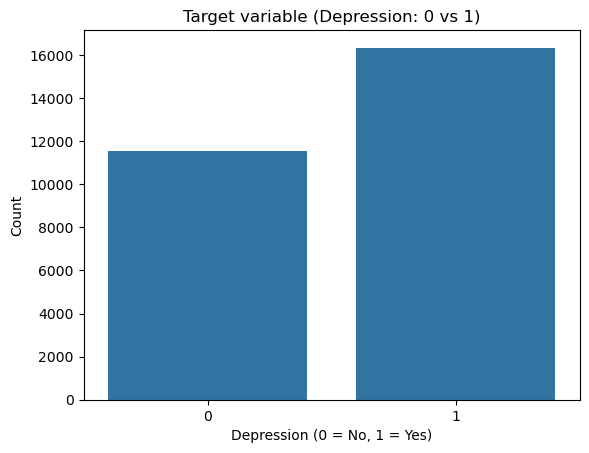

In [431]:
# see the class balanced/ or imbalnced

sns.countplot(x='Depression', data=df)
plt.title("Target variable (Depression: 0 vs 1)")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


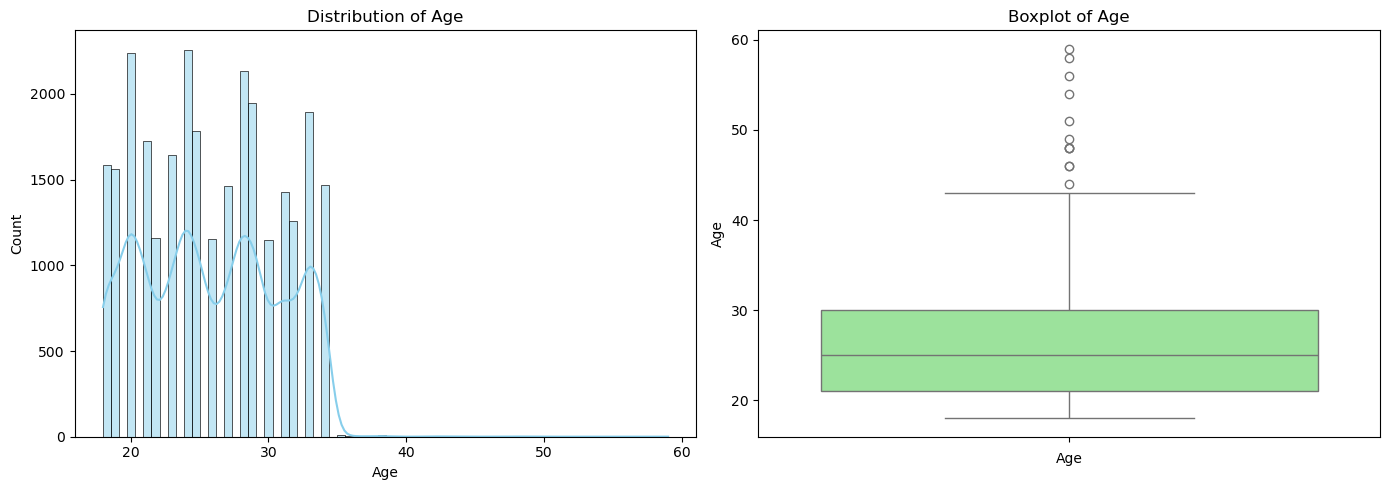

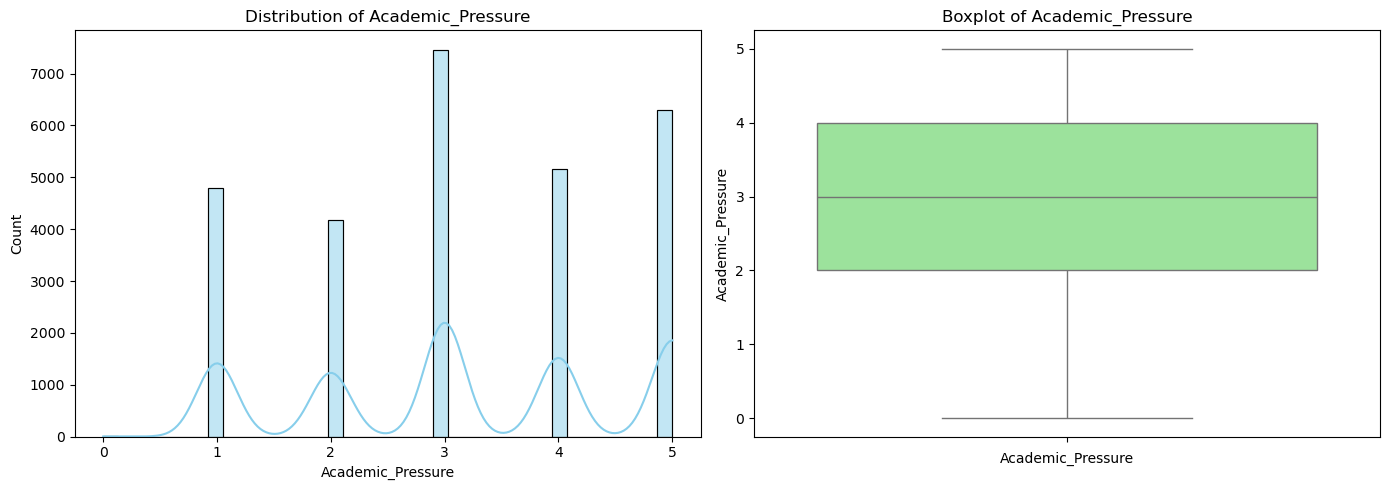

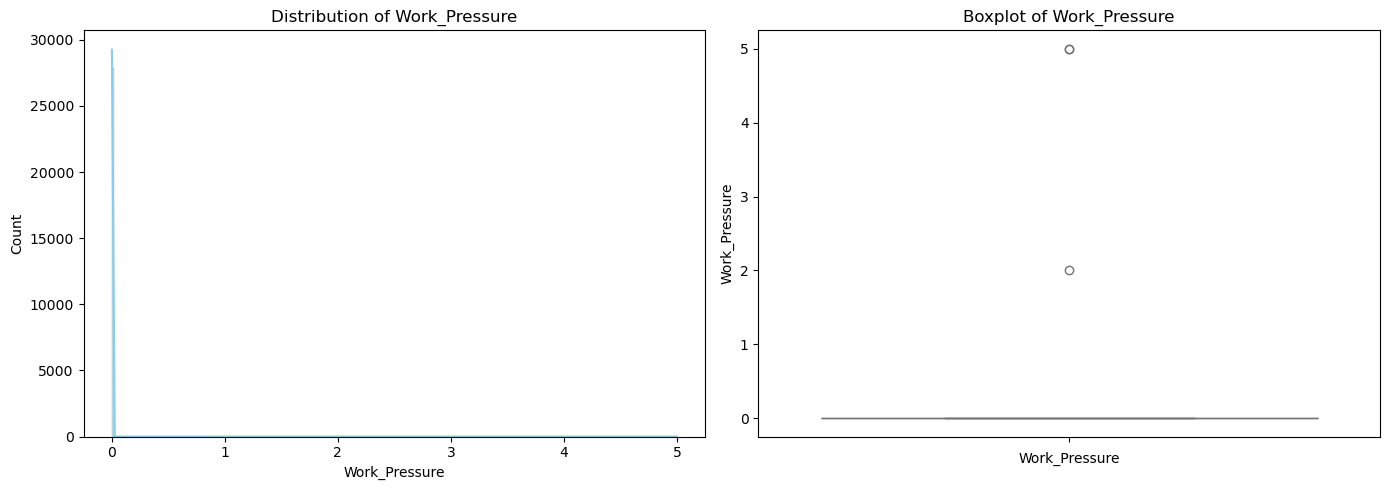

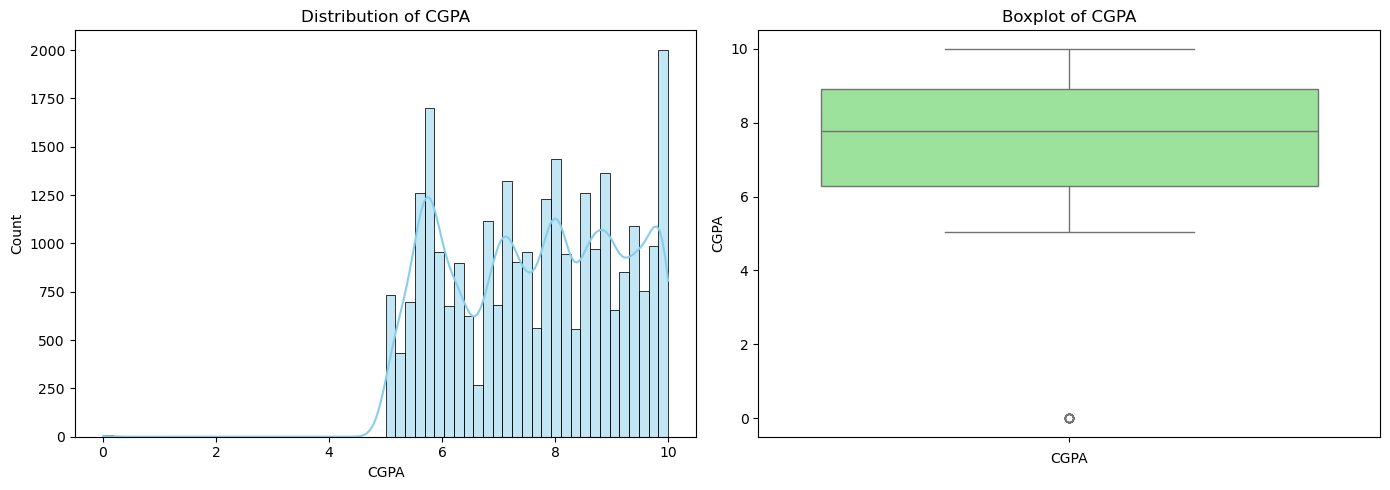

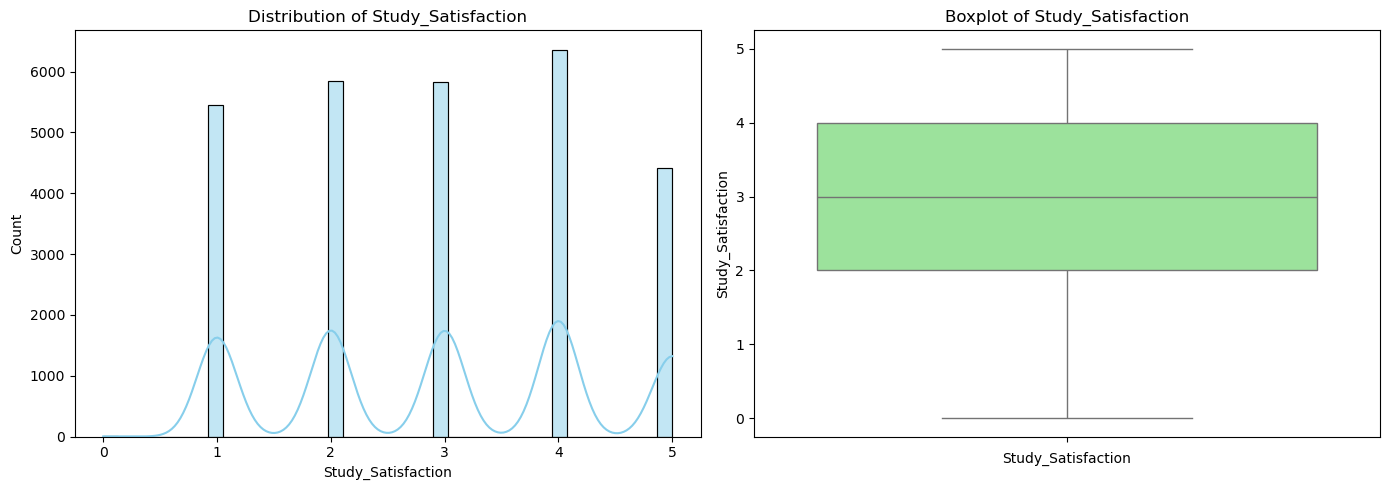

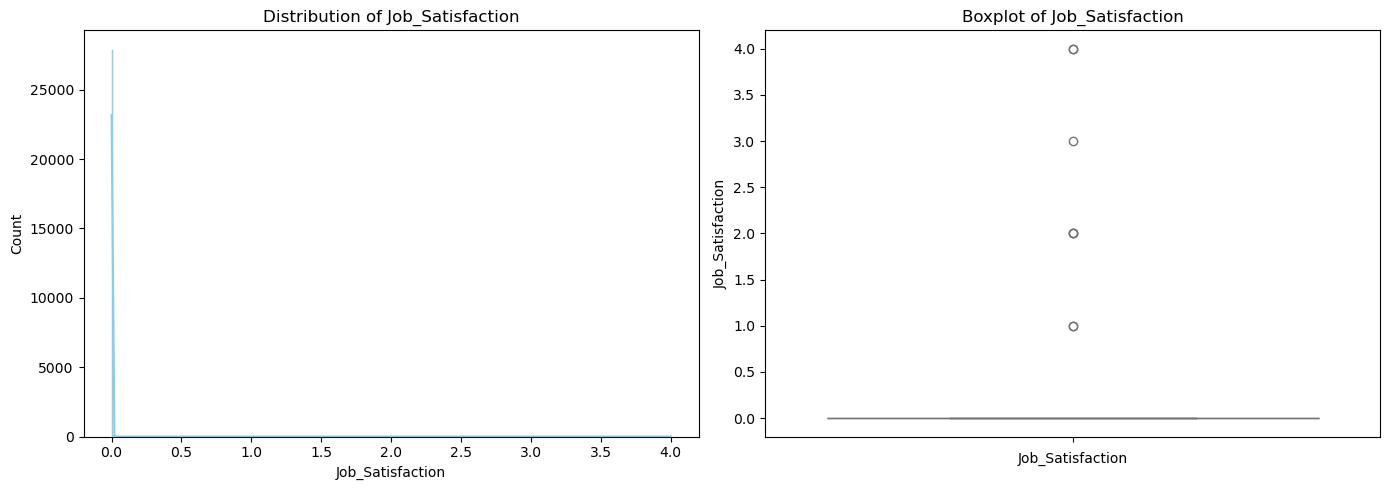

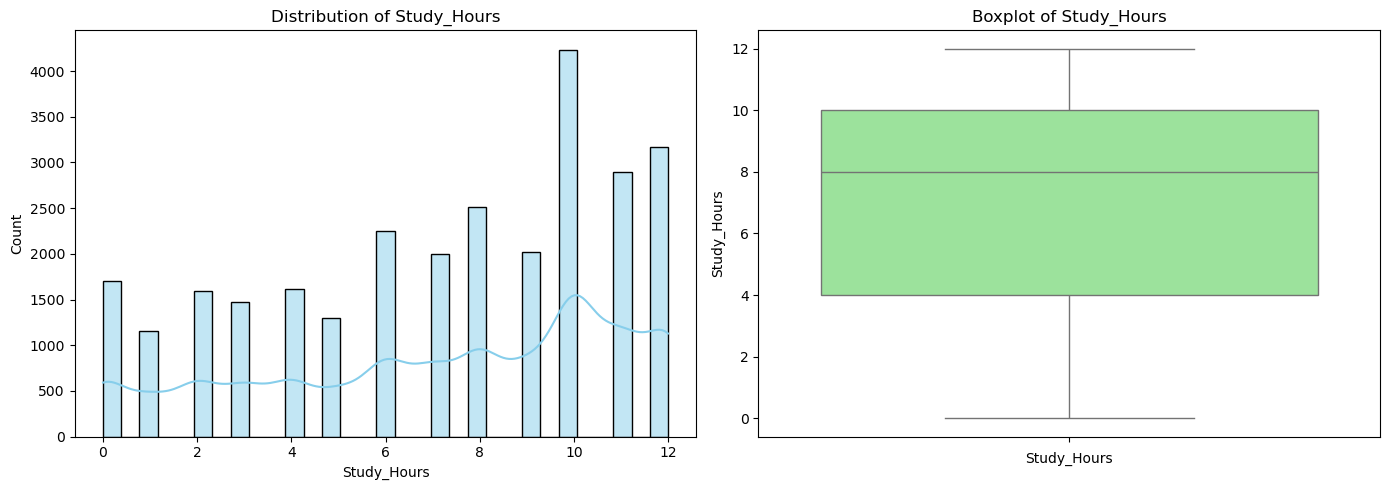

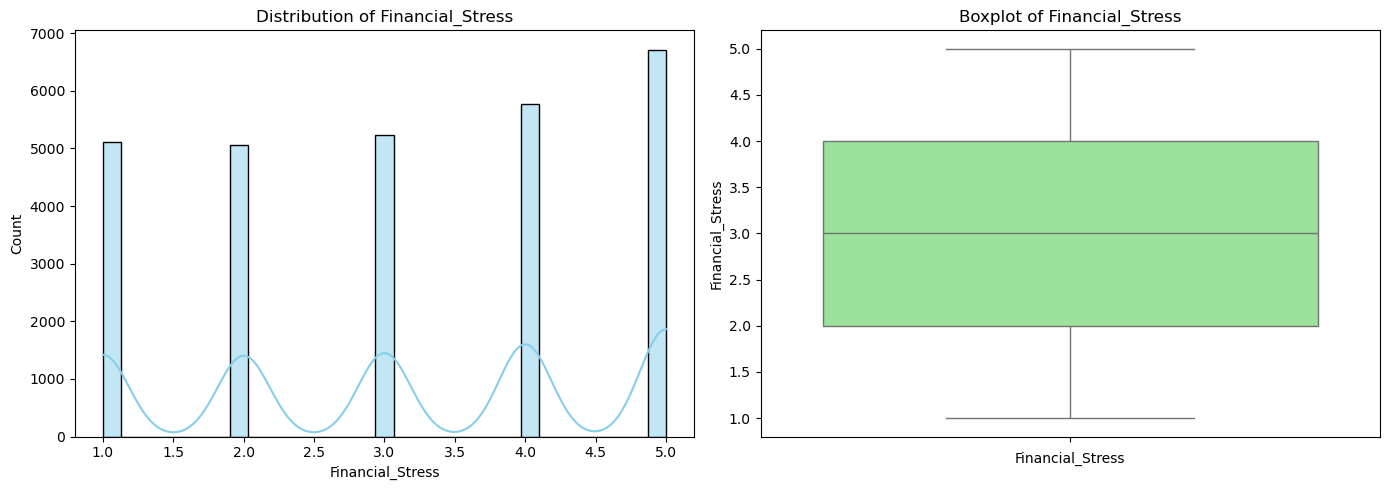

In [432]:

for col in numerical_cols_df:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True,color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Boxplot (to detect outliers)
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


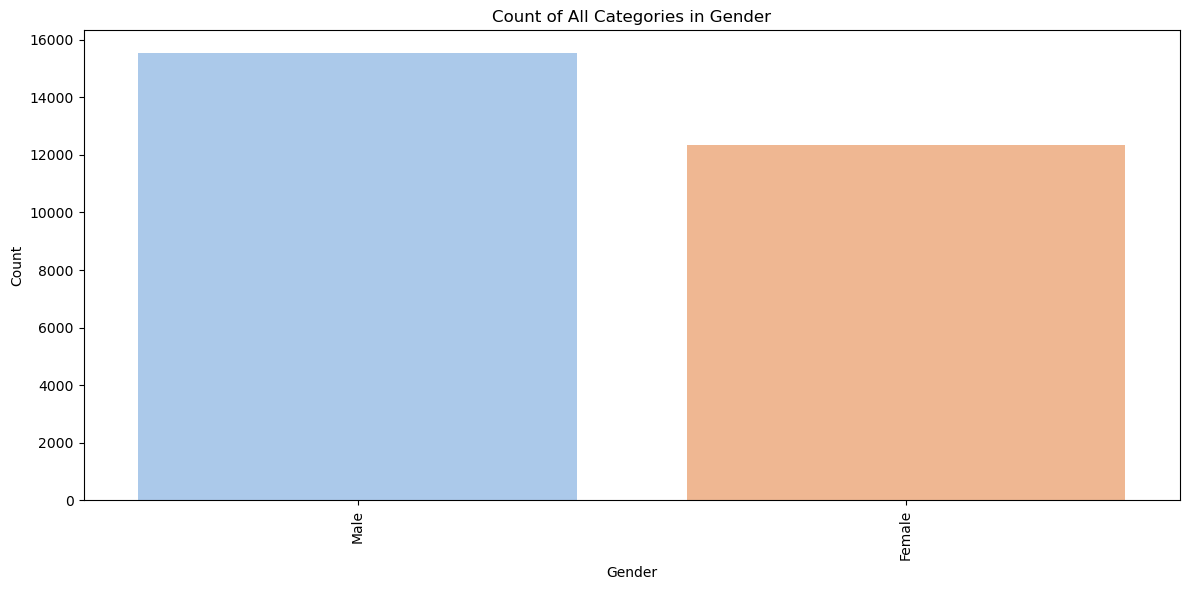

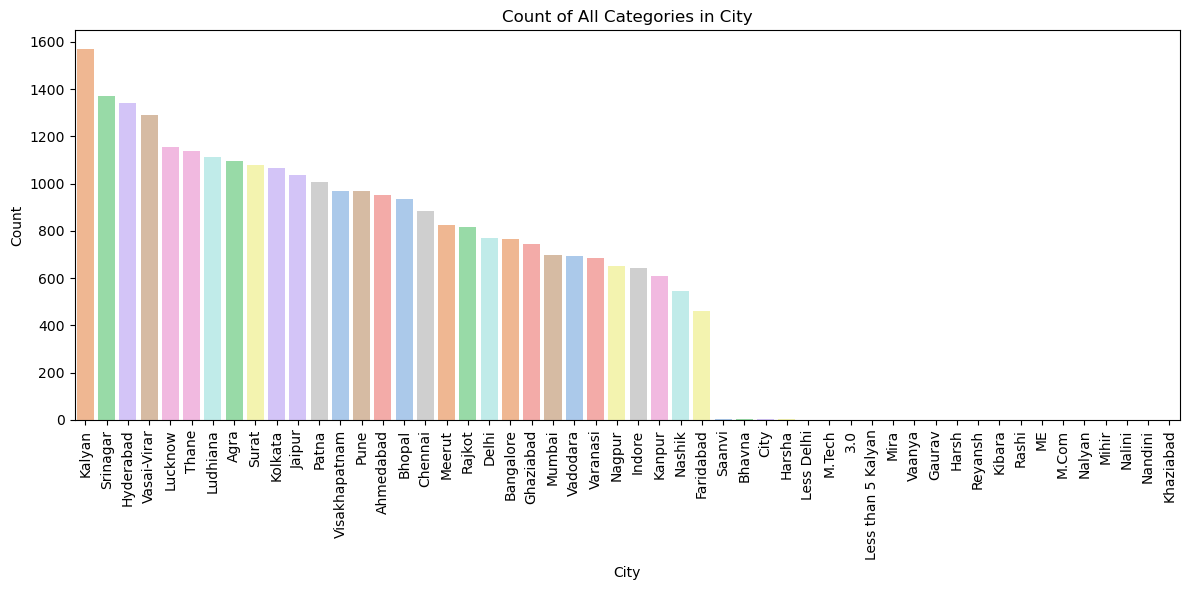

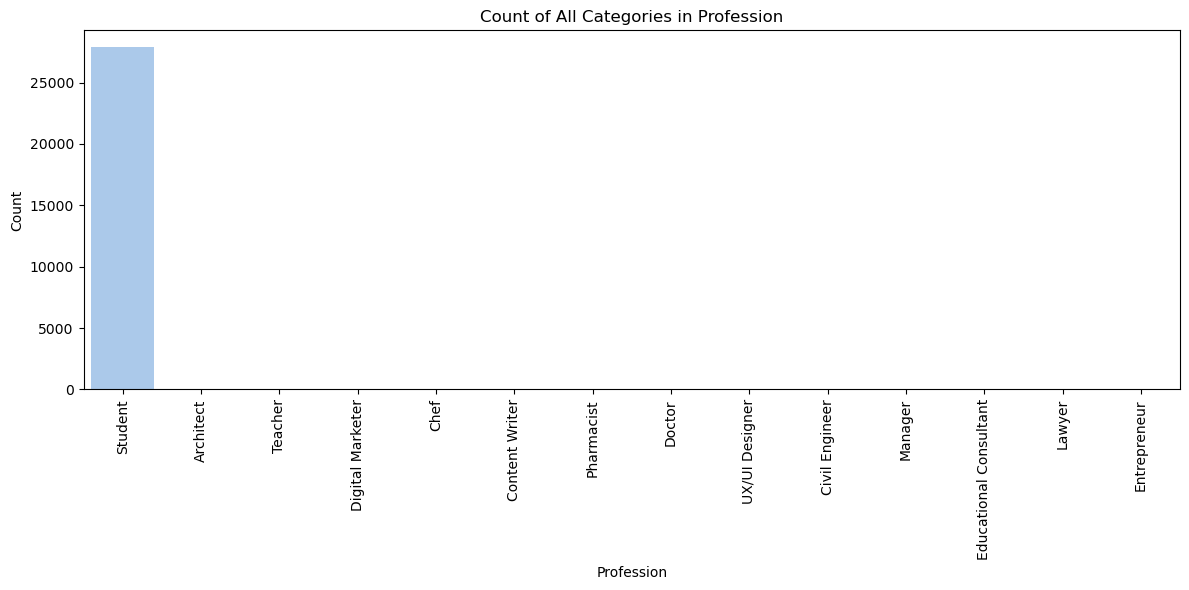

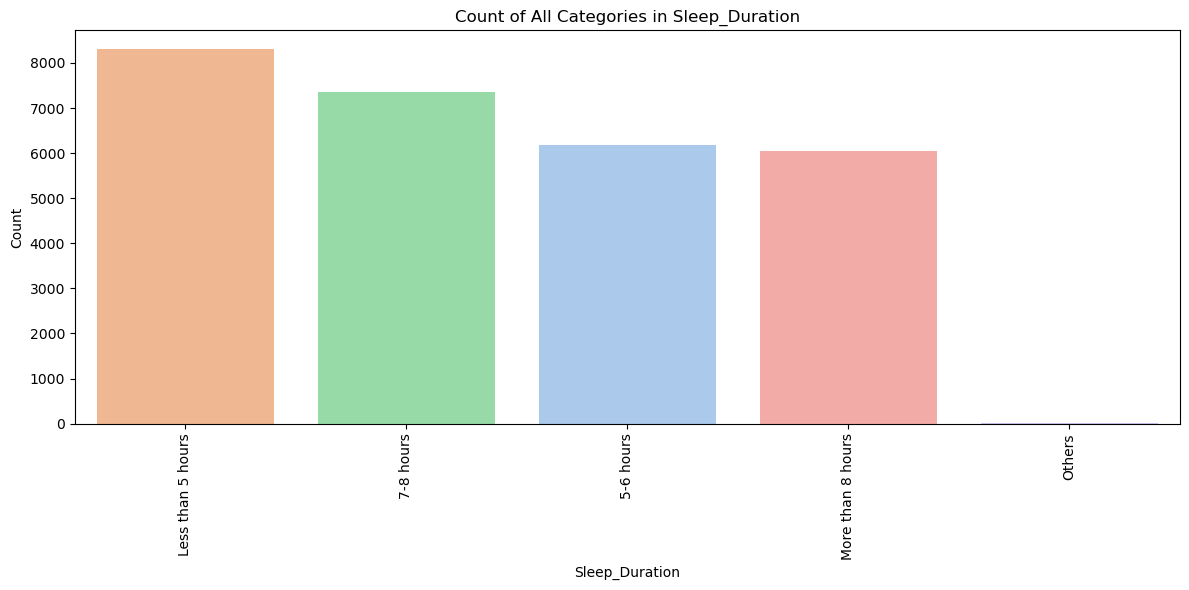

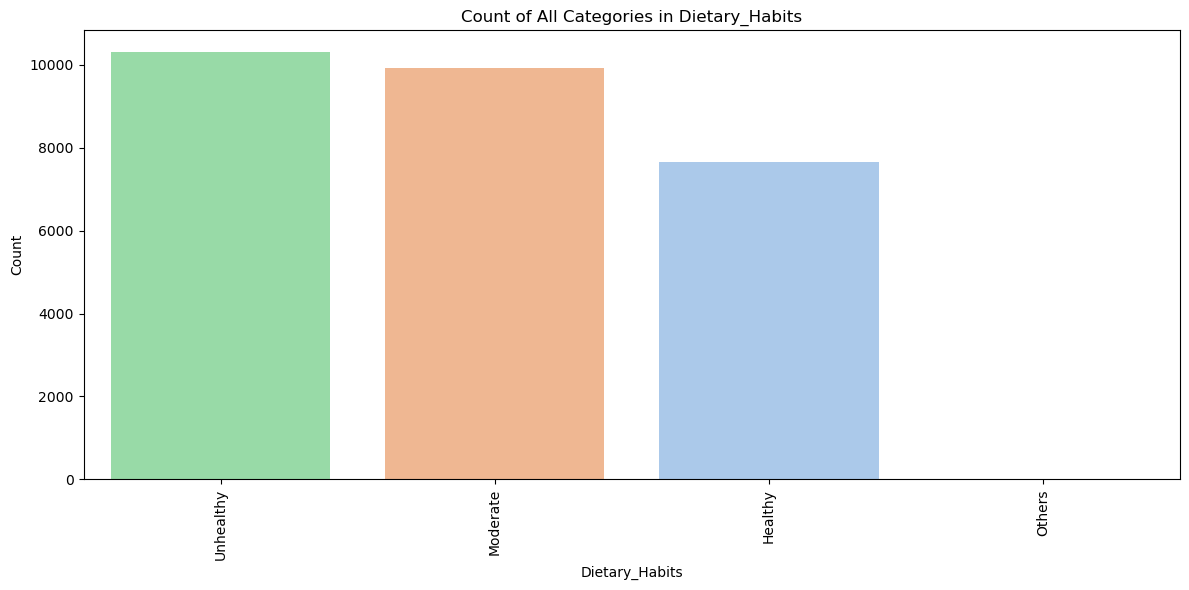

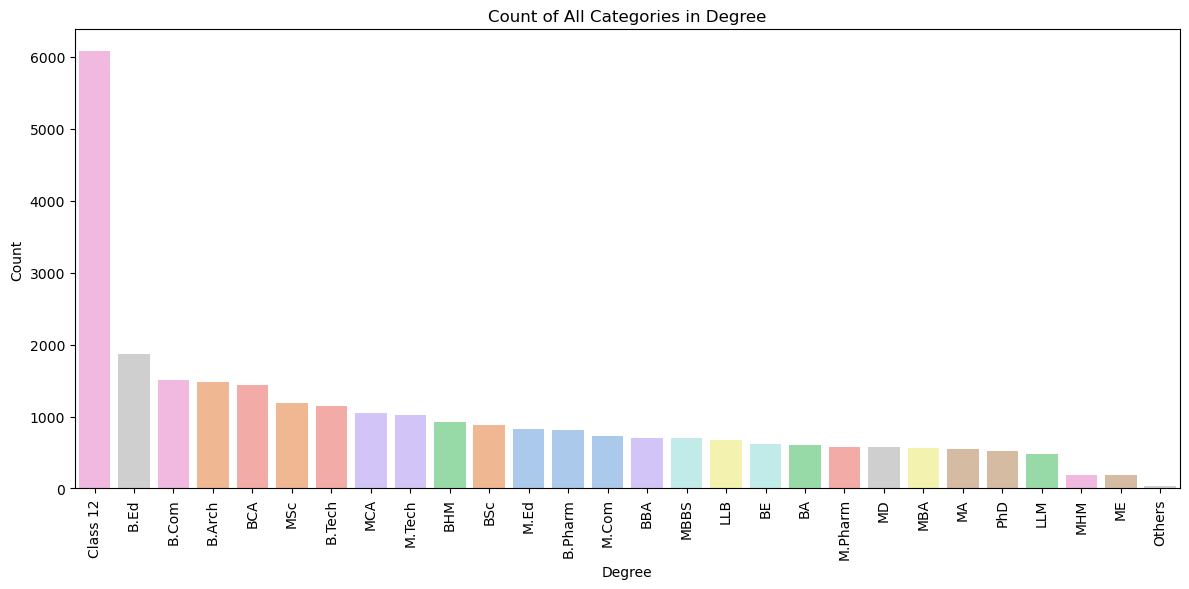

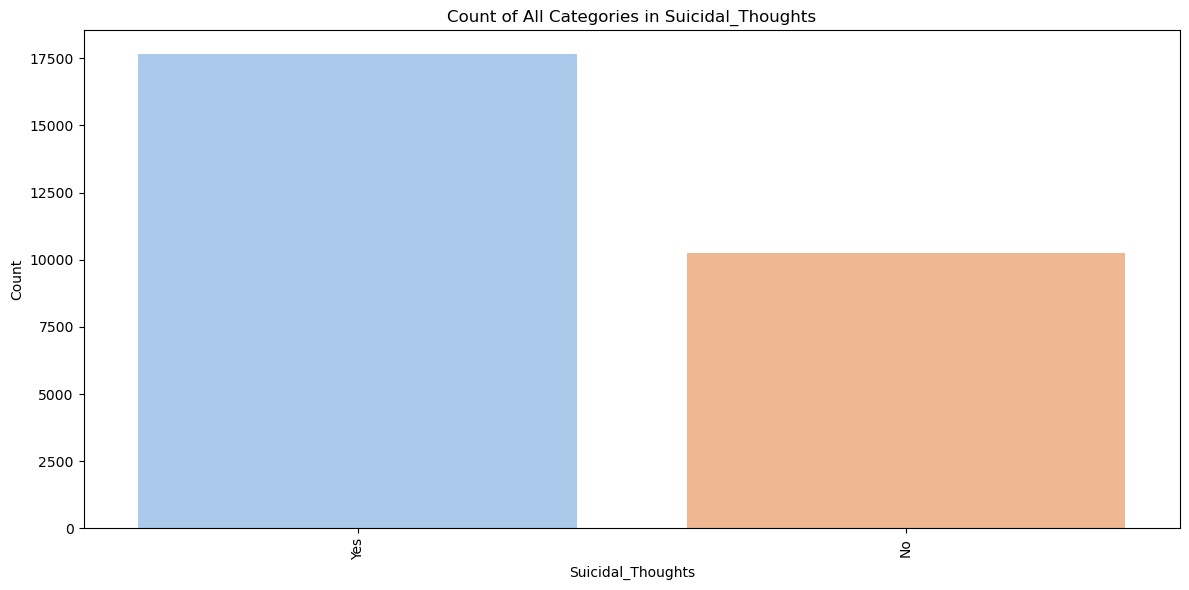

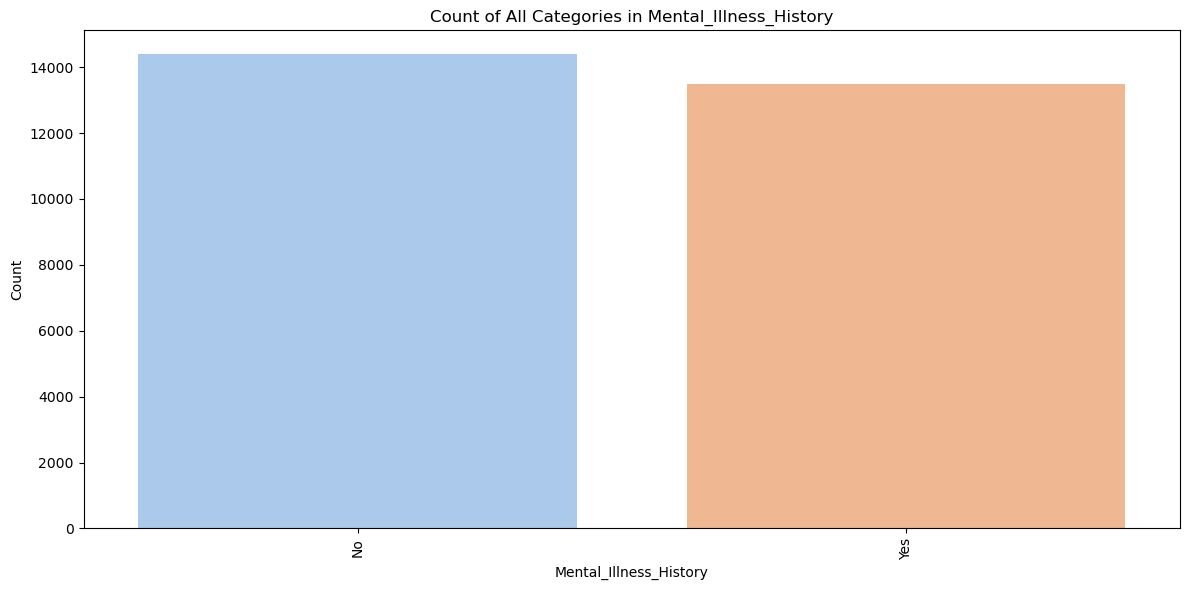

In [433]:
# plot for visualizing categorical variables

for col in categorical_cols_df:
    plt.figure(figsize=(12,6)) 

    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel',hue=col)

    plt.title(f'Count of All Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


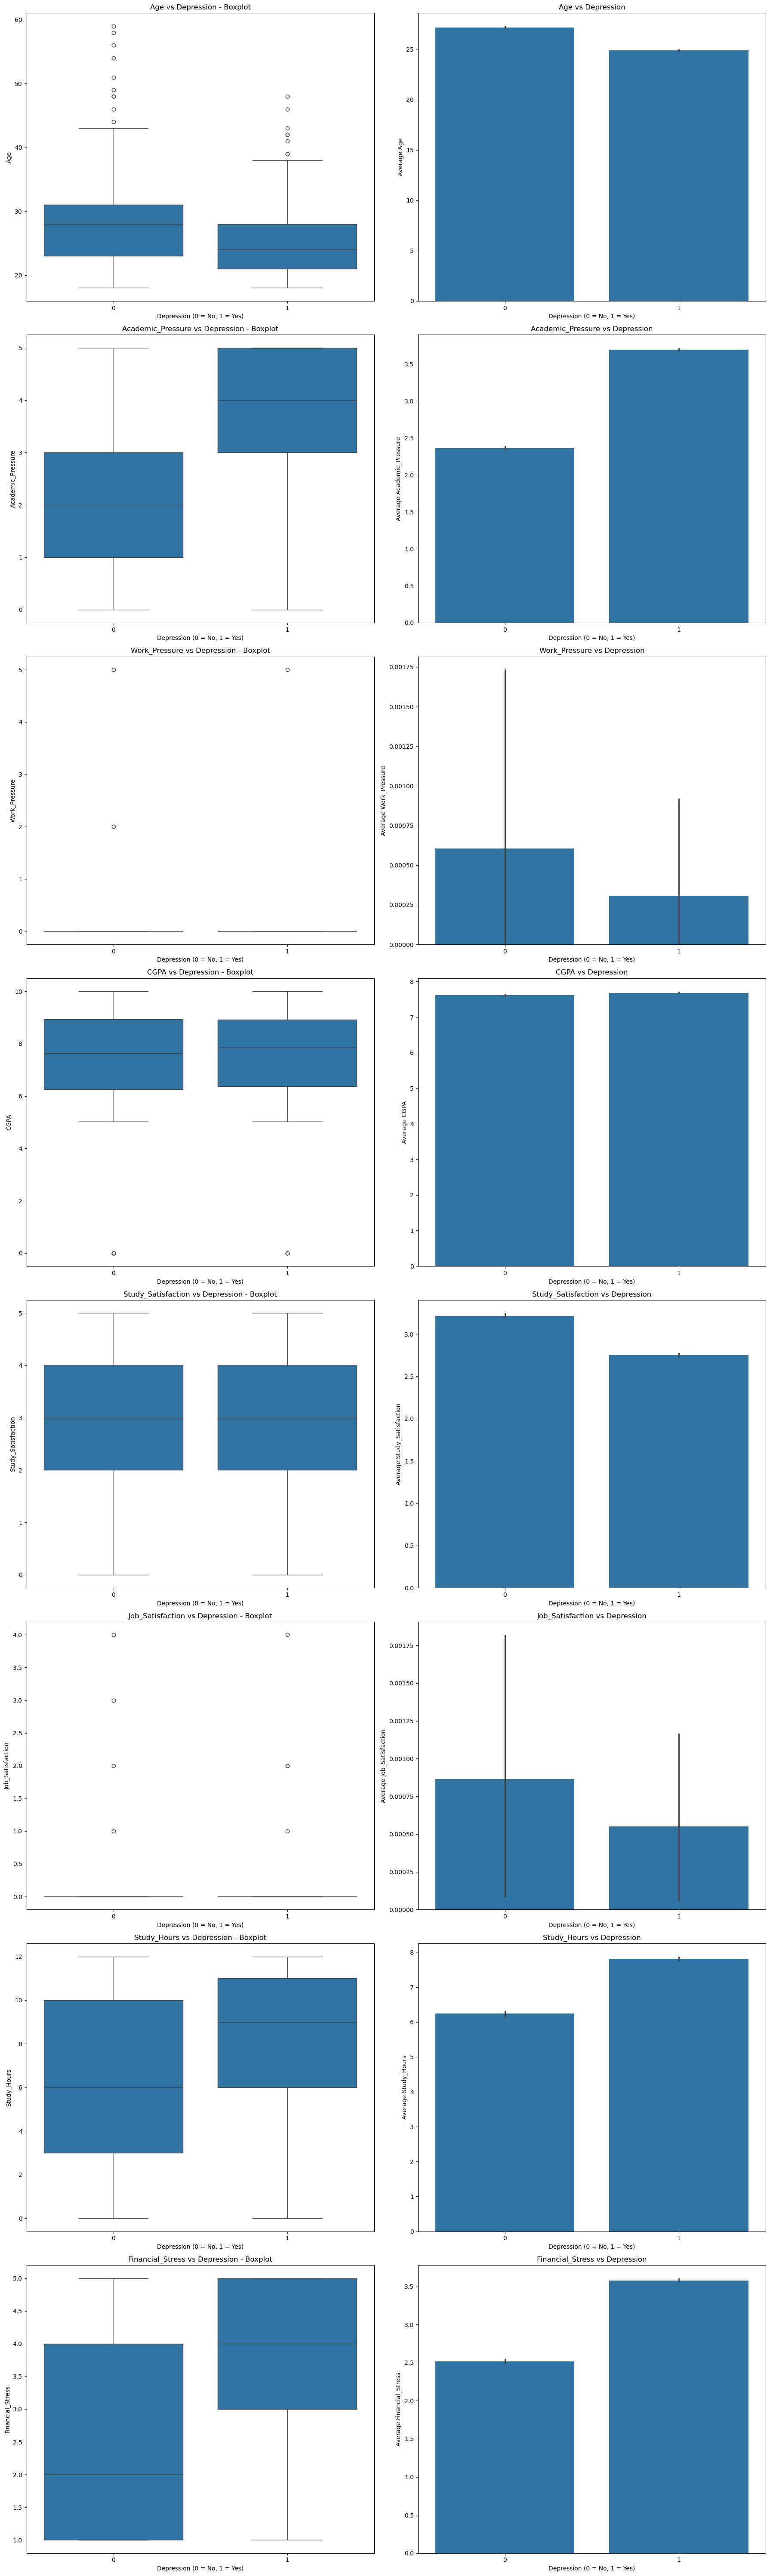

In [434]:

## analyze the relationship between depression and numarical variables
plt.figure(figsize=(18, 60))  # Double height for side-by-side plots

for i, col in enumerate(numerical_cols_df, 1):

    plt.subplot(len(numerical_cols_df), 2, 2 * i - 1)
    sns.boxplot(x='Depression', y=col, data=df)
    plt.title(f'{col} vs Depression - Boxplot')
    plt.xlabel('Depression (0 = No, 1 = Yes)')
    plt.ylabel(col)

    plt.subplot(len(numerical_cols_df), 2, 2 * i)
    sns.barplot(x='Depression', y=col, data=df)
    plt.title(f'{col} vs Depression')
    plt.xlabel('Depression (0 = No, 1 = Yes)')
    plt.ylabel(f'Average {col}')

plt.tight_layout()
plt.show()


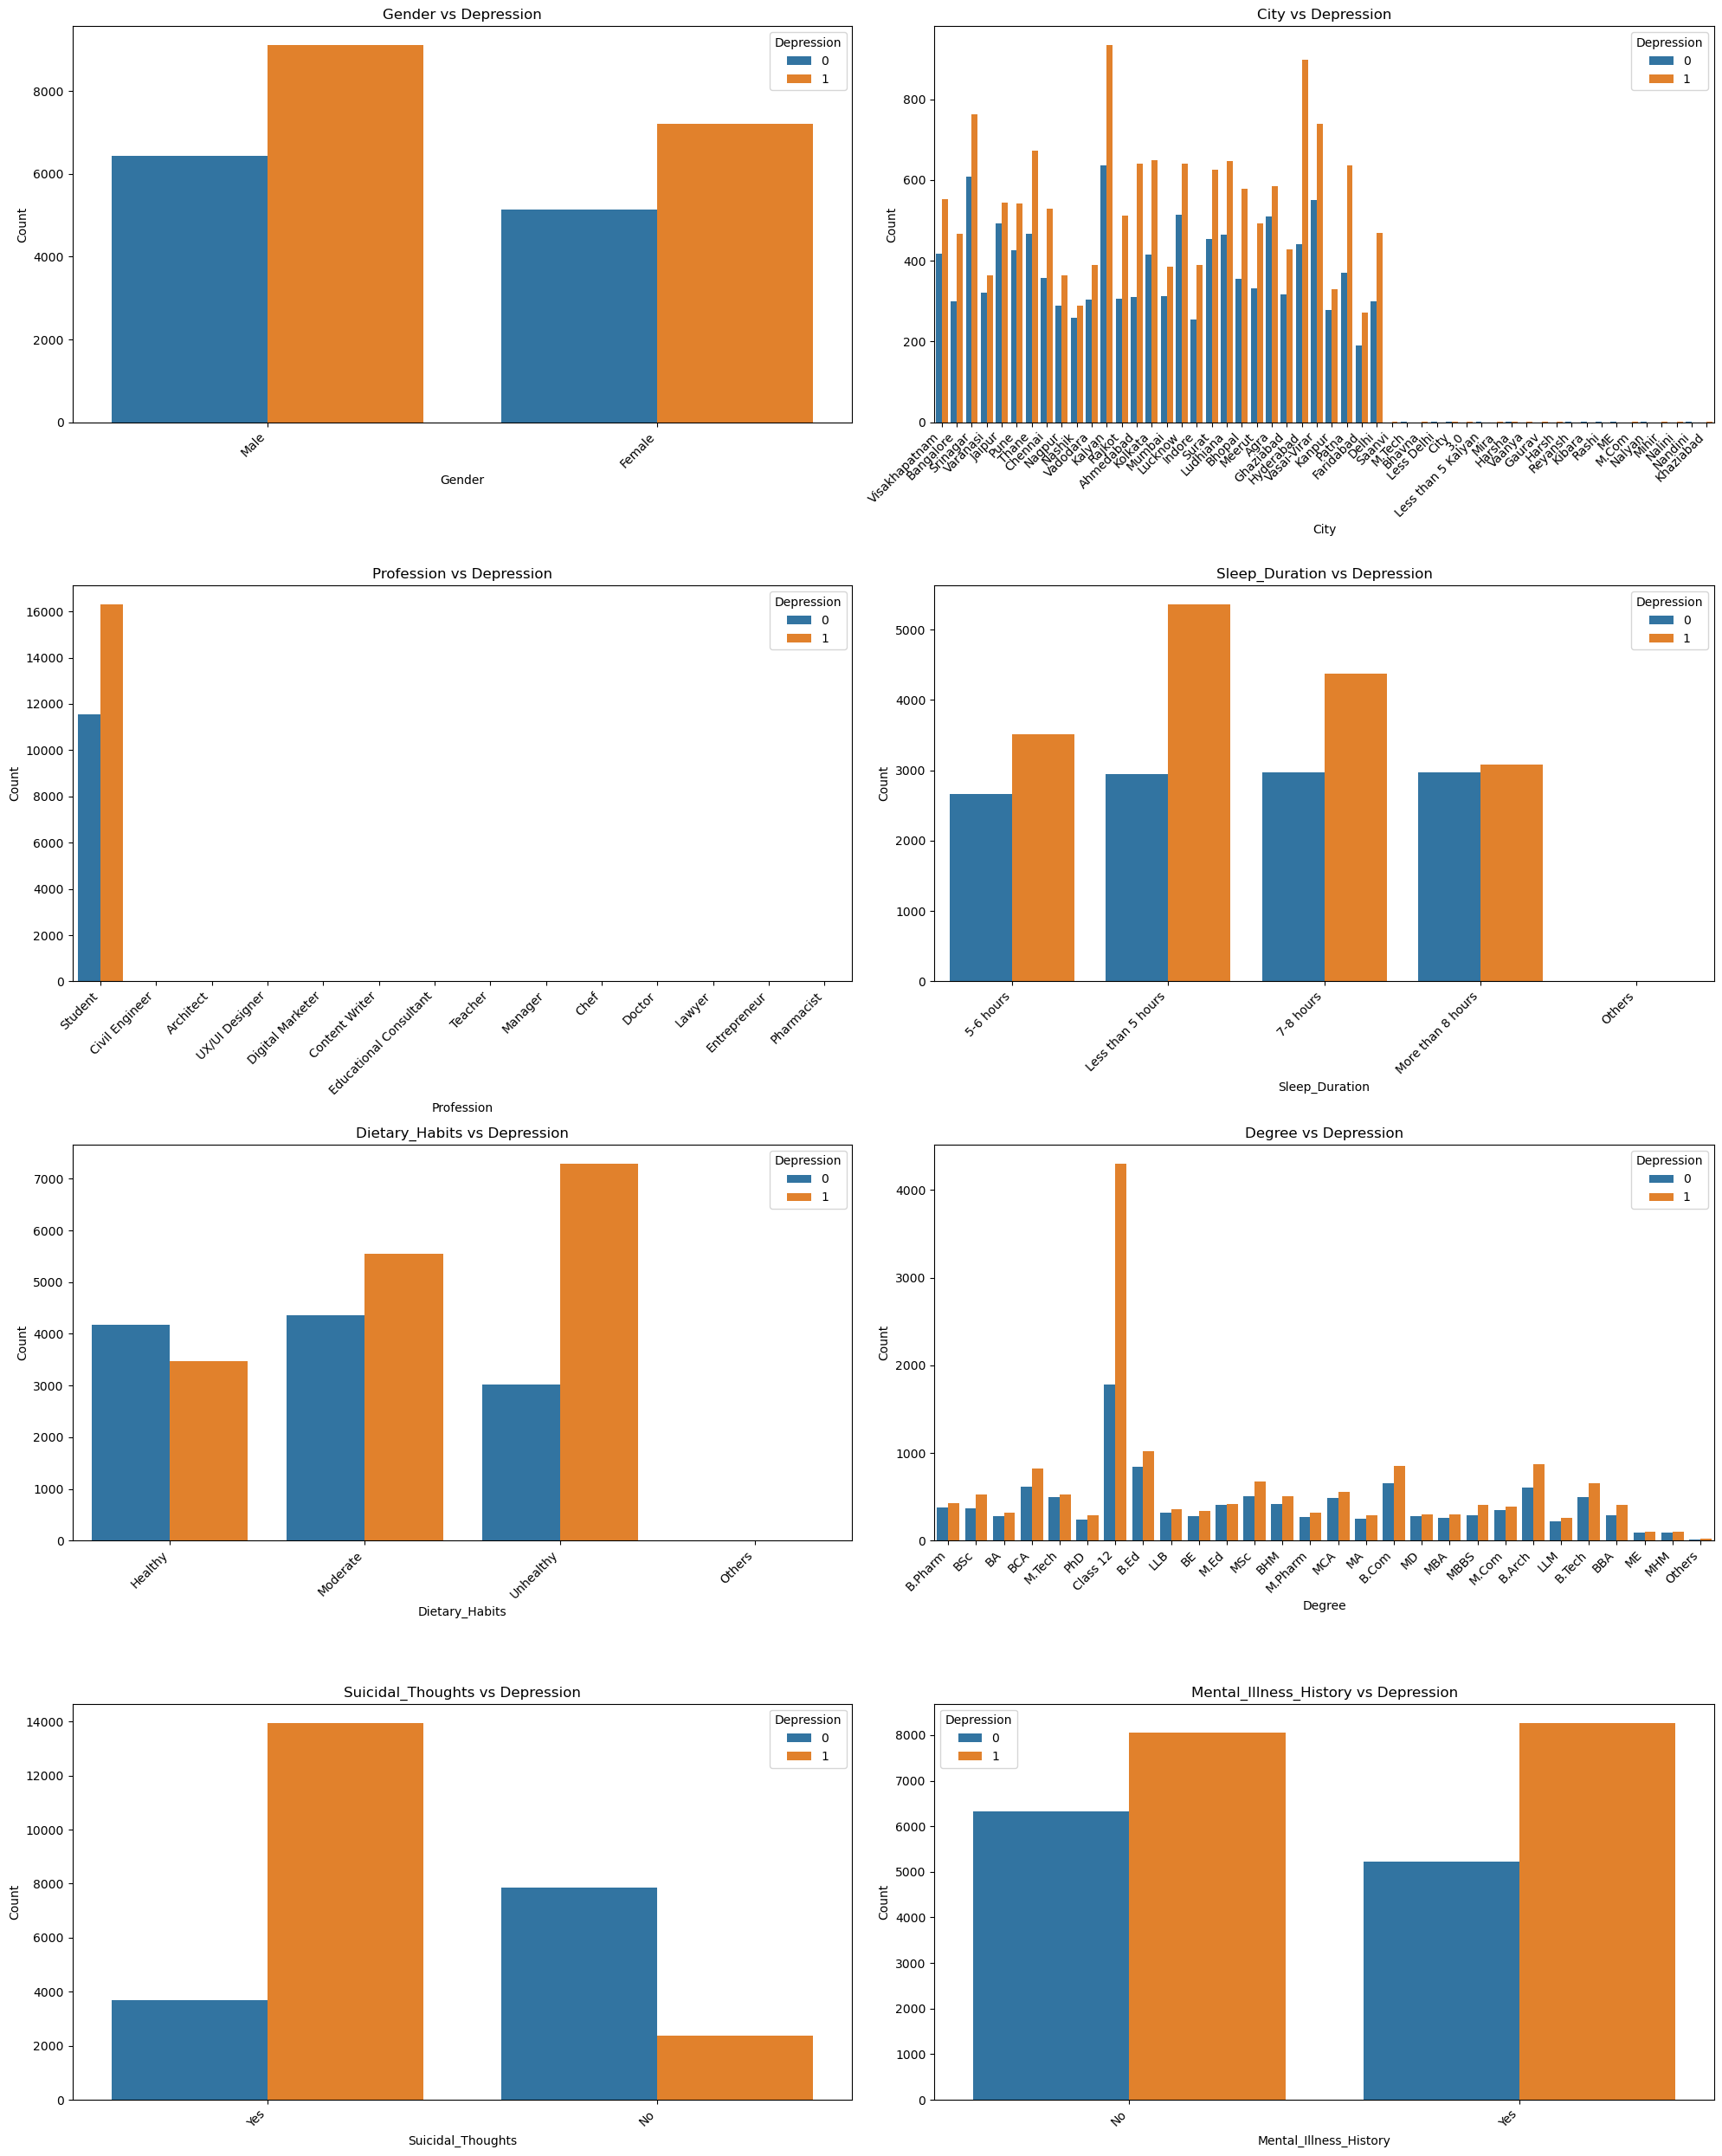

In [435]:
## analyze the relationship between depression and categorical variables

plt.figure(figsize=(20, 25))

for i, col in enumerate(categorical_cols_df, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col, hue='Depression')
    plt.title(f'{col} vs Depression')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


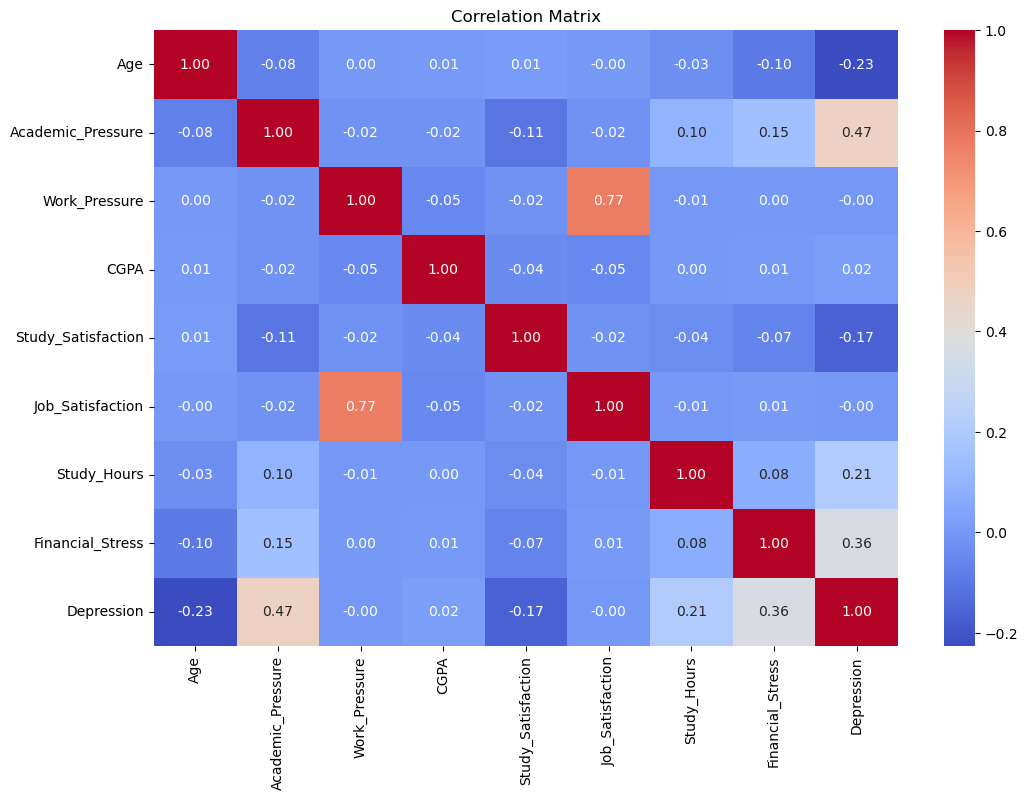

In [436]:
# correlation heatmap

plt.figure(figsize=(12, 8))
corr = df[numerical_cols_df + ['Depression']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [437]:
print(df['Work_Pressure'].value_counts())


Work_Pressure
0.0    27895
5.0        2
2.0        1
Name: count, dtype: int64


In [438]:
print(df['Job_Satisfaction'].value_counts())


Job_Satisfaction
0.0    27890
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64


In [439]:
df = df.drop(columns=['id','Job_Satisfaction', 'Work_Pressure','City'])


In [440]:
print(df.columns)


Index(['Gender', 'Age', 'Profession', 'Academic_Pressure', 'CGPA',
       'Study_Satisfaction', 'Sleep_Duration', 'Dietary_Habits', 'Degree',
       'Suicidal_Thoughts', 'Study_Hours', 'Financial_Stress',
       'Mental_Illness_History', 'Depression'],
      dtype='object')


In [441]:

#  categorical columns to do encoding  
categorical_cols= df.select_dtypes(include=['object']).columns.tolist()

print(f"categorical colums are : {categorical_cols}")

# Show unique values in categorical columns
for col in df.select_dtypes(include='object'):
    print(f"{col} : {data[col].nunique()}:\n {data[col].unique()}")
    


categorical colums are : ['Gender', 'Profession', 'Sleep_Duration', 'Dietary_Habits', 'Degree', 'Suicidal_Thoughts', 'Mental_Illness_History']
Gender : 2:
 ['Male' 'Female']
Profession : 14:
 ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Sleep_Duration : 5:
 ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
Dietary_Habits : 4:
 ['Healthy' 'Moderate' 'Unhealthy' 'Others']
Degree : 28:
 ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']
Suicidal_Thoughts : 2:
 ['Yes' 'No']
Mental_Illness_History : 2:
 ['No' 'Yes']


In [442]:
print(f"no of rows with 'others' in Dietary_Habits column : {(df['Dietary_Habits'] == 'Others').sum()}")

no of rows with 'others' in Dietary_Habits column : 12


In [443]:
print(f"no of rows with 'others' in Sleep_Duration column : {(df['Sleep_Duration'] == 'Others').sum()}")

no of rows with 'others' in Sleep_Duration column : 18


In [444]:
df = df.drop(df[df['Sleep_Duration'] == 'Others'].index)
df = df.drop(df[df['Dietary_Habits'] == 'Others'].index)

In [445]:
print(f"no of rows with 'others' in Dietary_Habits column : {(df['Dietary_Habits'] == 'Others').sum()}")

no of rows with 'others' in Dietary_Habits column : 0


In [446]:
print(f"no of rows with 'others' in Sleep_Duration column : {(df['Sleep_Duration'] == 'Others').sum()}")

no of rows with 'others' in Sleep_Duration column : 0


In [447]:
# drop the  3 rows with null values
df = df.dropna()

In [448]:
df.isnull().sum()

Gender                    0
Age                       0
Profession                0
Academic_Pressure         0
CGPA                      0
Study_Satisfaction        0
Sleep_Duration            0
Dietary_Habits            0
Degree                    0
Suicidal_Thoughts         0
Study_Hours               0
Financial_Stress          0
Mental_Illness_History    0
Depression                0
dtype: int64

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27868 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  27868 non-null  object 
 1   Age                     27868 non-null  float64
 2   Profession              27868 non-null  object 
 3   Academic_Pressure       27868 non-null  float64
 4   CGPA                    27868 non-null  float64
 5   Study_Satisfaction      27868 non-null  float64
 6   Sleep_Duration          27868 non-null  object 
 7   Dietary_Habits          27868 non-null  object 
 8   Degree                  27868 non-null  object 
 9   Suicidal_Thoughts       27868 non-null  object 
 10  Study_Hours             27868 non-null  float64
 11  Financial_Stress        27868 non-null  float64
 12  Mental_Illness_History  27868 non-null  object 
 13  Depression              27868 non-null  int64  
dtypes: float64(6), int64(1), object(7)
memory u

In [450]:
profession_counts = df['Profession'].value_counts()
print(profession_counts)


Profession
Student                   27837
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64


In [451]:
threshold = 10
rare_professions = profession_counts[profession_counts < threshold].index.tolist()
print("Rare professions:", rare_professions)


Rare professions: ['Architect', 'Teacher', 'Digital Marketer', 'Chef', 'Content Writer', 'Pharmacist', 'Doctor', 'UX/UI Designer', 'Civil Engineer', 'Manager', 'Educational Consultant', 'Lawyer', 'Entrepreneur']


In [452]:
df['Profession'] = df['Profession'].apply(lambda x: x if x not in rare_professions else 'Other')


In [453]:
profession_counts = df['Profession'].value_counts()
print(profession_counts)


Profession
Student    27837
Other         31
Name: count, dtype: int64


In [466]:
df.to_csv("cleaned_student_depression.csv", index=False)
